# Happy Customers
## Introduction
**Background:**
- We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.
- We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.
- Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.
- We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description:**  
The data can be described as follows:
- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

<ins>Note:</ins> Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Download Data:**
- https://drive.google.com/open?id=1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD

**Goal(s):**
- Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics:**
- Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.
- Try to submit your working solution as soon as possible. The sooner the better.

**Bonus(es):**
- We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

### Libraries

In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from operator import itemgetter

# Warnings imports
import warnings
warnings.filterwarnings("ignore")

# Xgboost imports
from xgboost import XGBClassifier

# Sklearn imports
from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel, RFE, RFECV

### Helper function(s)

In [4]:
# This function prints a horizontal line for delineating outputs
def barrier():
    print("\n <<<","-"*50,">>> \n")

# This function saves models
def save_model(model, name):
    with open("models/"+name+".pkl", "wb") as f:
        pickle.dump(model, f)
    print(f"Model: {name}.pkl saved.")

# This function loads models
def load_model(name):
    with open("models/"+name, "rb") as f:
        model = pickle.load(f)
    return model

## Data
### Exploratory data analysis (EDA)

In [5]:
df = pd.read_csv("raw_data.csv")

In [6]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [8]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
# Missing values
print(df.isnull().sum())
barrier()
print(df.isna().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

 <<< -------------------------------------------------- >>> 

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


**NOTE:**
- We can conclude that there are no missing values in the dataset.

In [10]:
# Value counts
for col in df.columns:
    print(df[col].value_counts())
    barrier()

Y
1    69
0    57
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X2
3    42
2    34
1    27
4    17
5     6
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X3
3    55
4    33
5    17
2    14
1     7
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X4
4    53
3    41
5    25
2     5
1     2
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X5
4    50
5    31
3    22
2    16
1     7
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 

X6
5    57
4    47
3    20
2     1
1     1
Name: count, dtype: int64

 <<< -------------------------------------------------- >>> 



### Graphical EDA

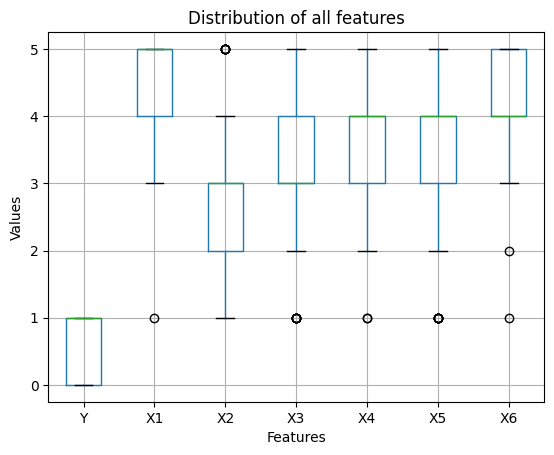

In [11]:
# Boxplot
df.boxplot()
plt.title("Distribution of all features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(visible=True)
plt.show()

In [12]:
# Correlation df
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


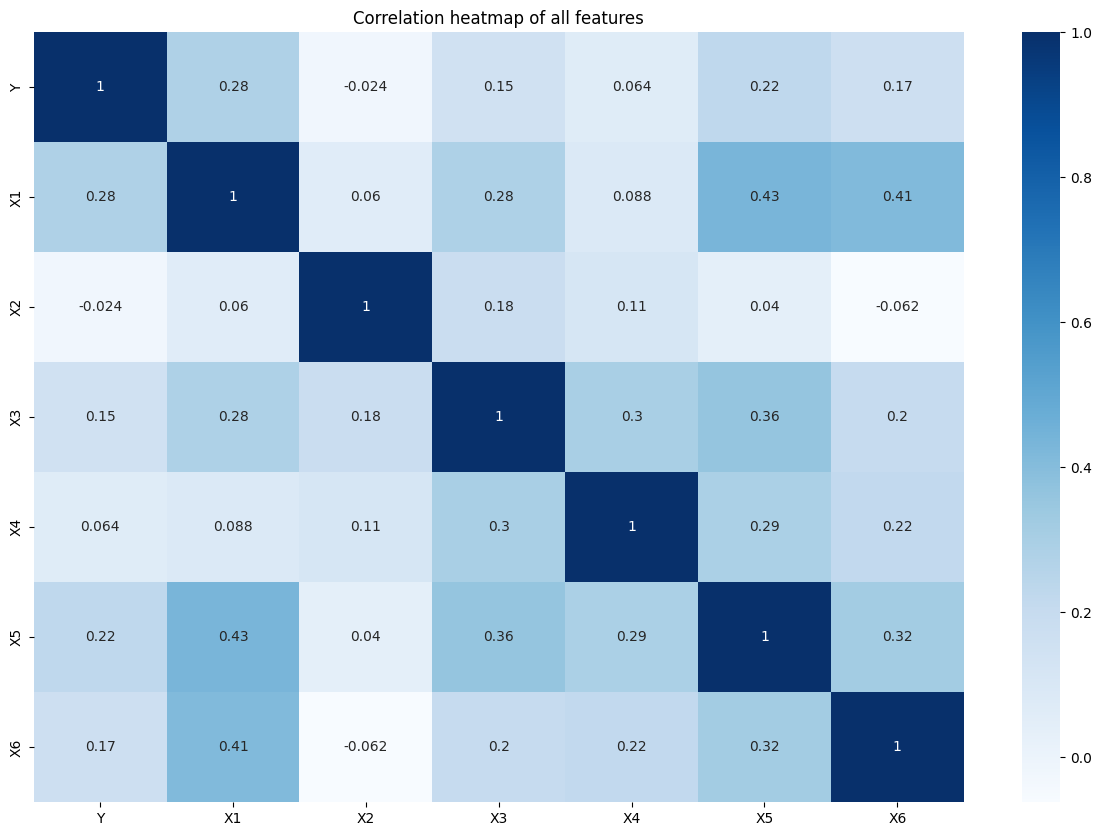

In [13]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(15, 10))  
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation heatmap of all features")
plt.show()

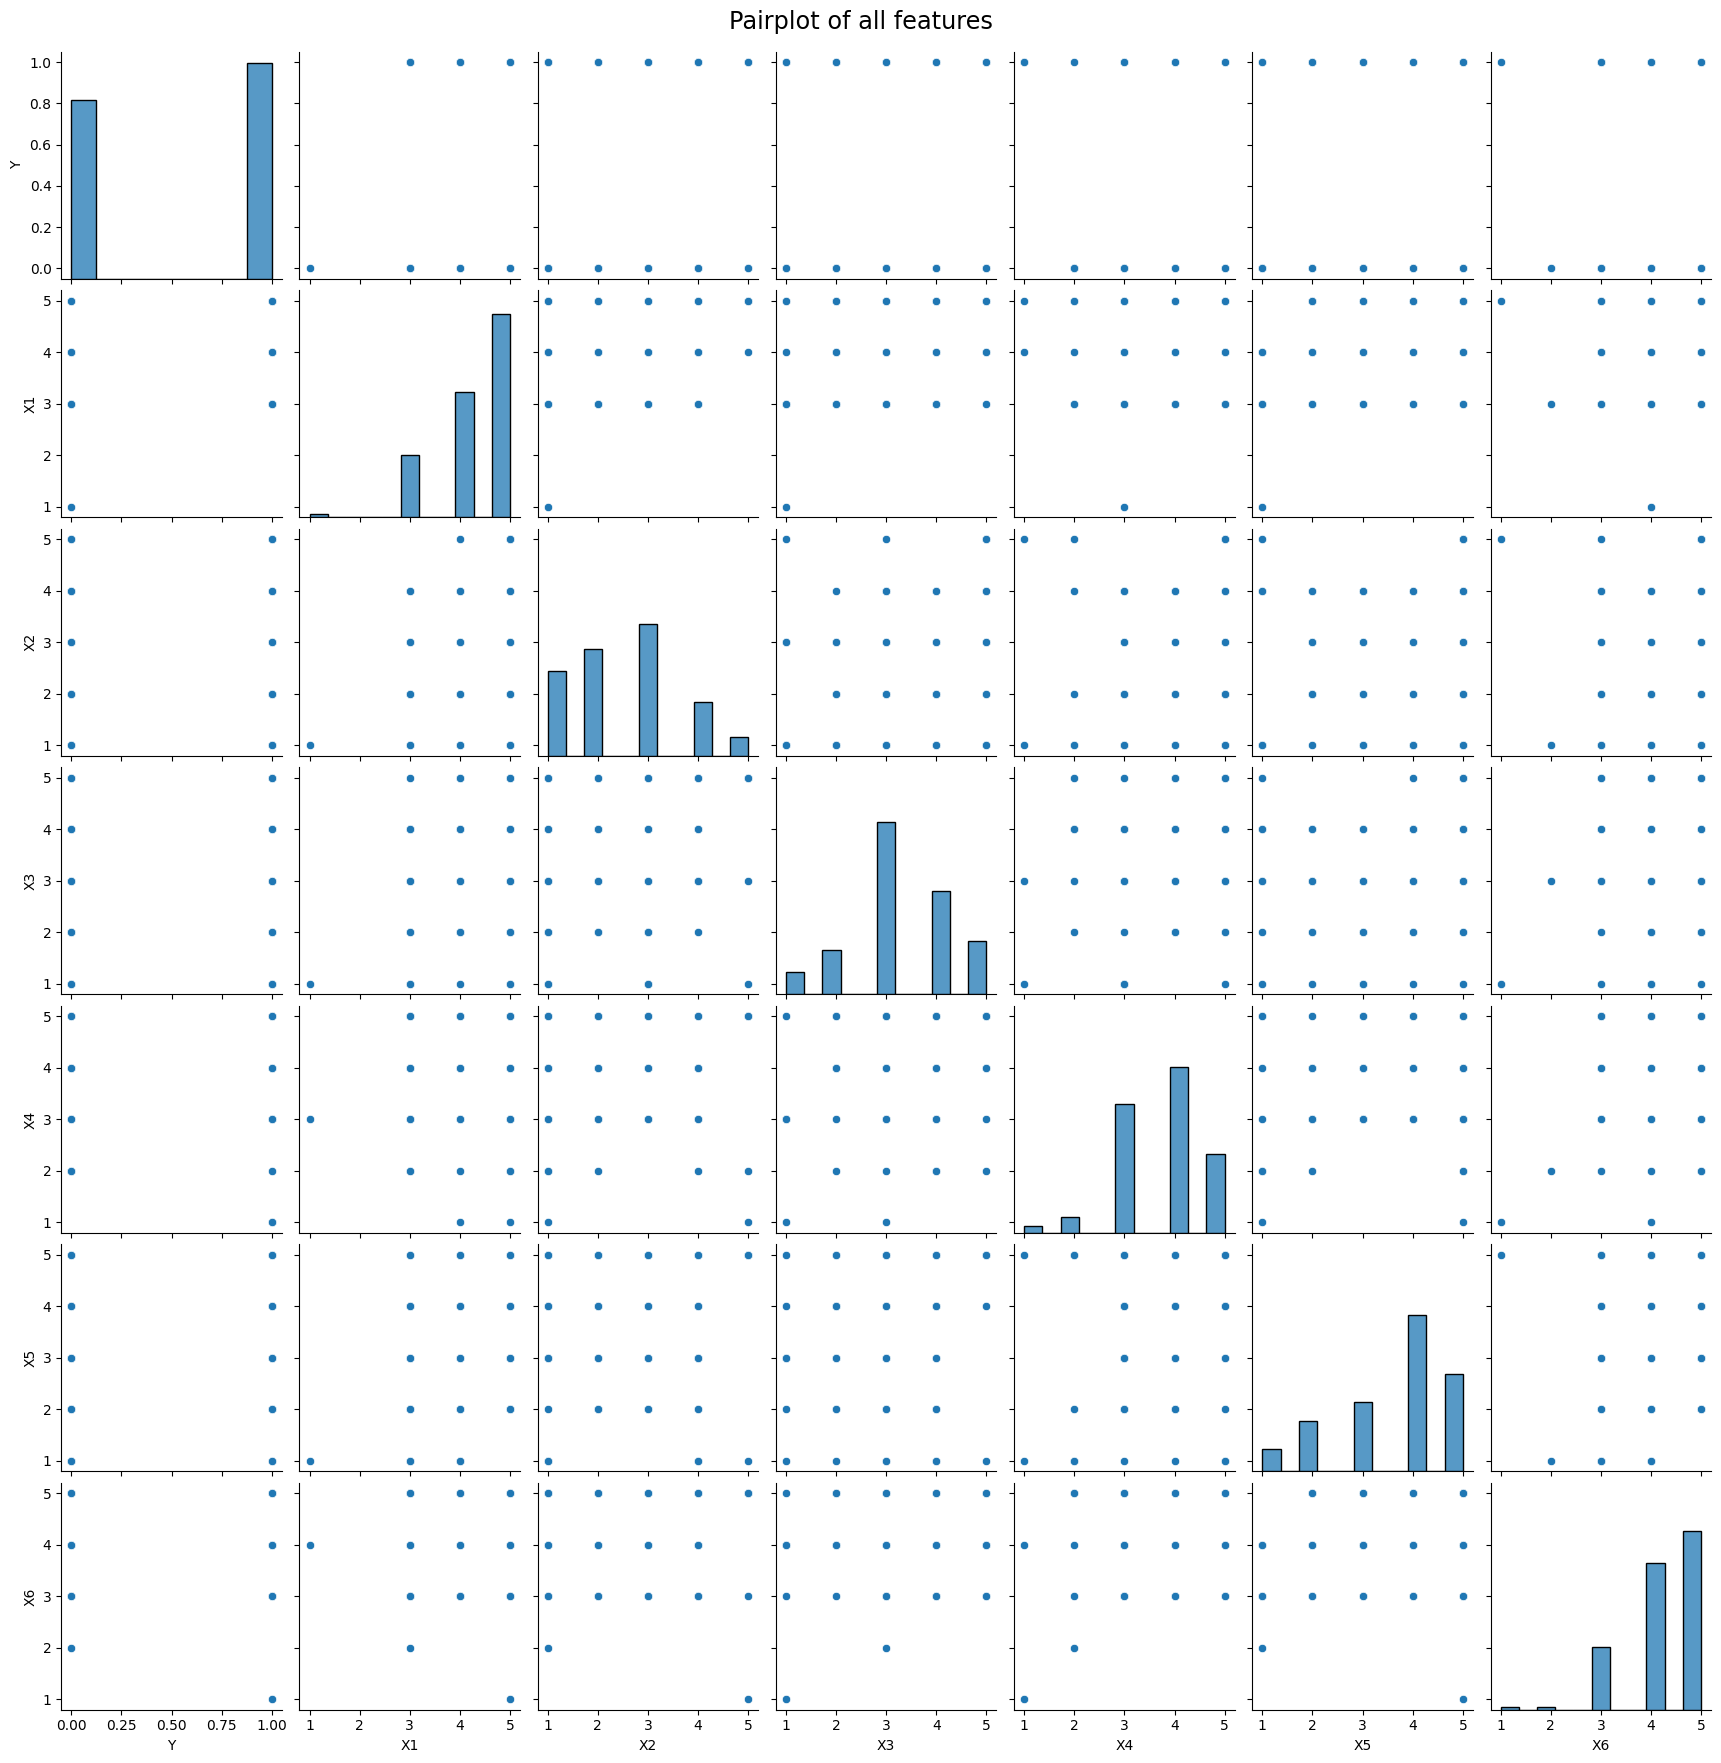

In [14]:
# Pairplot
g = sns.pairplot(df)
g.fig.suptitle("Pairplot of all features", y=1.01, size="xx-large")
plt.show()

### Train and test split

In [15]:
y = df["Y"]
X = df.drop("Y", axis=1)
RANDOM_STATE = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 6), (100,), (26, 6), (26,))

In [17]:
y_train.sum(), y_test.sum(), y.sum()

(np.int64(56), np.int64(13), np.int64(69))

## Modelling - Setup

### Methodology

**NOTE:**
- There is a very small sample size of only 126 entries. This will very likely affect the modeling process.
- Since we are targeting customers, we may make the intelligent assumption that KNN will be a good model since it is very good at classifying customer behaviors and customer demographics.
- Since we have limited data, an ensemble method with bootstrap aggregating like  XGBoost will likely also perform well.
- This will be investigated in the sections below.

**NOTE:**
- Model hyperparameters are tuned for best performance and to mitigate overfitting. This is done using cross validation.
- Cross validation can be performed using the GridSearchCV or RandomizedSearchCV libraries.
    - It can also be done "manually" using nested for loops and parameter sweeping.
    - Where multiple kinds of hyperparameter tuning is performed in this Section 3, they will be numbered at the top of the cell eg #1, #2, #3 etc.
- It should be noted that:
    - Hyperparameter tuning is expensive; both computationally and timewise.
    - Certain models may produce unrepeatable/unstable scores that change significantly with each evaluation despite the parameters remaining unchanged. This is due to some inherent randomness in the model's process and is exacerbated by the small sample size. We will note this when we encounter it.

### Lazypredict

In [18]:
# Lazy preliminary assessment of multiple models
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560000 -> initscore=0.241162
[LightGBM] [Info] Start training from score 0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

**NOTE:**
- Lazypredict provides an initial estimation of how different models may perform with the data.
- However, this assessment should be considered a rough guideline as it is made without model tuning. Thus, it will only serve informational purposes going forward.

### Model evaluation functions

In [19]:
# Functions to evaluate models
def cm_df(model):
    y_pred = model.predict(X_test)
    df=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])
    return df

def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Training accuracy: ", model.score(X_train, y_train))
    print("Test accuracy: ", accuracy_score(y_test, y_pred))
    barrier()
    print("Confusion matrix:")
    display(cm_df(model))
    barrier()
    print("Classification report:")
    print(classification_report(y_test, y_pred))

def evaluate_no_fit(model):
    y_pred = model.predict(X_test)
    print("Training accuracy: ", model.score(X_train, y_train))
    print("Test accuracy: ", accuracy_score(y_test, y_pred))
    barrier()
    print("Confusion matrix:")
    display(cm_df(model))
    barrier()
    print("Classification report:")
    print(classification_report(y_test, y_pred))

def cv_std(cv):
    y = cv.cv_results_["std_test_score"]
    x = np.arange(1, y.shape[0] + 1)
    print(f"Mean of the standard deviations: {y.mean()}")
    print(f"Std of the standard deviations: {y.std()}")
    barrier()
    plt.plot(x, y)
    plt.title("Standard devs of CV scores")
    plt.xlabel("Param Candidates")
    plt.ylabel("Stds")
    plt.show()

## Modelling

### K nearest neighbors (KNN)

In [20]:
# No tuning
KNN = KNeighborsClassifier()
evaluate(KNN)

Training accuracy:  0.75
Test accuracy:  0.46153846153846156

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,4,9
Actual_1,5,8



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.47      0.62      0.53        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.46      0.46      0.45        26



#### Hyperparameter tuning

In [21]:
# 1
KNN = KNeighborsClassifier()

param_grid = {"n_neighbors": [i for i in range(1, 21)], "weights": ["uniform", "distance"], "p": [1, 2],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": range(1, 30)}

model_cv = GridSearchCV(KNN, param_grid, verbose=1, n_jobs=-1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 9280 candidates, totalling 46400 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Tuned model best score: 0.7

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.71
Test accuracy:  0.5

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,5,8
Actual_1,5,8



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



Mean of the standard deviations: 0.07438015937262565
Std of the standard deviations: 0.026335150798217875

 <<< -------------------------------------------------- >>> 



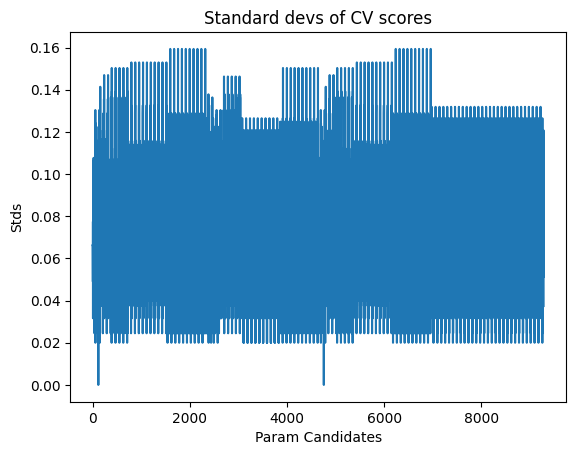

In [22]:
# Evaluate stds
cv_std(model_cv)

In [23]:
# 2
n_neighbors = range(1, 21)
weights = ["uniform", "distance"]
algo = ["auto", "ball_tree", "kd_tree", "brute"]
leaf_size = range(1, 30)
power = [1, 2]
best_score = 0
hyper_params = ""

for n in n_neighbors:
    for w in weights:
        for a in algo:
            for l in leaf_size:
                for p in power:
                    KNN = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a, leaf_size=l, p=p)
                    KNN.fit(X_train, y_train)                   
                    y_pred = KNN.predict(X_test)
                    if accuracy_score(y_test, y_pred) > best_score:
                        best_score = accuracy_score(y_test, y_pred)
                        hyper_params = str(n) + "_" + w + "_" + a + "_" + str(l) + "_" + str(p)

print(best_score)
print(hyper_params)

0.7692307692307693
12_uniform_auto_13_2


In [24]:
# Using best parameters
KNN = KNeighborsClassifier(n_neighbors=12, weights="uniform", algorithm="auto", leaf_size=13, p=2)
evaluate(KNN)

Training accuracy:  0.65
Test accuracy:  0.7692307692307693

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,9,4
Actual_1,2,11



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.73      0.85      0.79        13

    accuracy                           0.77        26
   macro avg       0.78      0.77      0.77        26
weighted avg       0.78      0.77      0.77        26



**NOTE:**
- Test accuracy (77%) exceeds the goal of 73% or more.
- Training accuracy is 65%.

In [25]:
# Save model
save_model(KNN, "KNN")

Model: KNN.pkl saved.


### XGBoost

In [26]:
# No tuning
XGB = XGBClassifier()
evaluate(XGB)

Training accuracy:  0.93
Test accuracy:  0.5769230769230769

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,6,7
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



#### Hyperparameter tuning

In [27]:
# 1
XGB = XGBClassifier()

param_grid = {"min_child_weight": [1, 5, 10], "gamma": [0.5, 1, 1.5, 2, 5], "subsample": [0.6, 0.8, 1.0],
              "colsample_bytree": [0.6, 0.8, 1.0], "max_depth": [3, 4, 5]}

model_cv = GridSearchCV(XGB, param_grid, verbose=1, n_jobs=-1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
Tuned model best score: 0.6699999999999999

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.81
Test accuracy:  0.6153846153846154

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,5,8
Actual_1,2,11



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



Mean of the standard deviations: 0.0550473280596406
Std of the standard deviations: 0.03007667681624947

 <<< -------------------------------------------------- >>> 



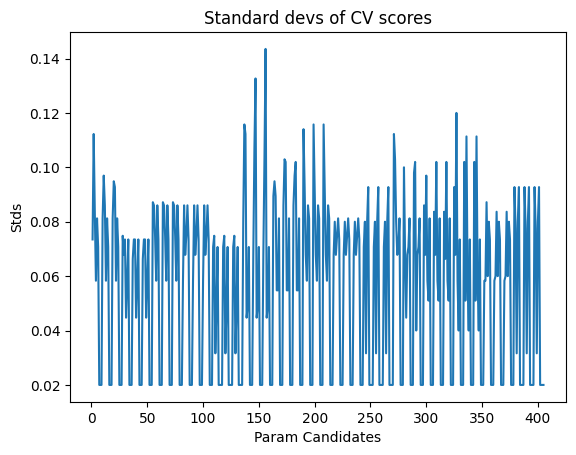

In [28]:
# Evaluate stds
cv_std(model_cv)

In [29]:
# 2
weights = [1, 5, 10]
gammas = [0.5, 1, 1.5, 2, 5]
subsamples = [0.6, 0.8, 1.0]
col_samples = [0.6, 0.8, 1.0]
max_depths = [3, 4, 5]
best_score = 0
hyper_params = ""

for w in weights:
    for g in gammas:
        for s in subsamples:
            for c in col_samples:
                for m in max_depths:
                    XGB = XGBClassifier(min_child_weight=w, gamma=g, subsample=s, colsample_bytree=c, max_depth=m)
                    XGB.fit(X_train, y_train)
                    y_pred = XGB.predict(X_test)
                    if accuracy_score(y_test, y_pred) > best_score:
                        best_score = accuracy_score(y_test, y_pred)
                        hyper_params = str(w) + "_" + str(g) + "_" + str(s) + "_" + str(c) + "_" + str(m)

print(best_score)
print(hyper_params)

0.7307692307692307
1_1.5_1.0_0.8_3


In [30]:
# Using best parameters
XGB = XGBClassifier(min_child_weight=1, gamma=1.5, subsample=1, colsample_bytree=0.8, max_depth=3)
evaluate(XGB)

Training accuracy:  0.72
Test accuracy:  0.7307692307692307

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,10,3
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.75      0.69      0.72        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



**NOTE:**
- Test accuracy (73%) matches the goal of 73% or more and is slightly less than the KNN model (77%).
- Training accuracy is 72% which is better than the KNN model (65%).

In [31]:
# Save model
save_model(XGB, "XGB")

Model: XGB.pkl saved.


### Support vector machine (SVM)

In [32]:
# No tuning
SVM = Pipeline([("scale", StandardScaler()), ("SVC", SVC())])
evaluate(SVM)

Training accuracy:  0.82
Test accuracy:  0.5

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,5,8
Actual_1,5,8



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



#### Hyperparameter tuning

In [33]:
# 1
SVM = SVC()
param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"], "degree": [1, 2, 3, 4],
              "gamma": ["scale", "auto"]}

model_cv = GridSearchCV(SVM, param_grid, verbose=1, n_jobs = -1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Tuned model best score: 0.6399999999999999

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.8
Test accuracy:  0.46153846153846156

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,7,6
Actual_1,8,5



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.45      0.38      0.42        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



Mean of the standard deviations: 0.05512624956084523
Std of the standard deviations: 0.036723243448195185

 <<< -------------------------------------------------- >>> 



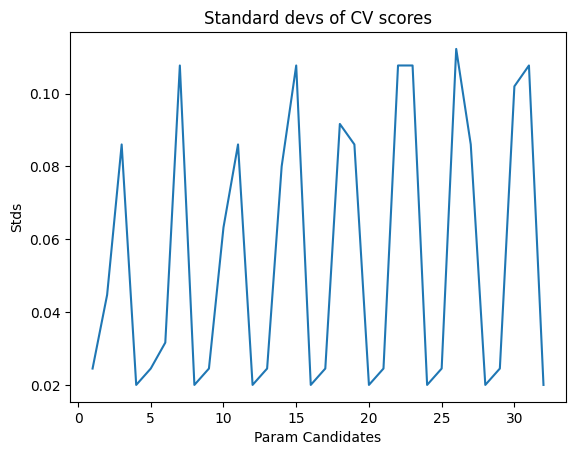

In [34]:
# Evaluate stds
cv_std(model_cv)

In [35]:
# 2
kernel_types = ["linear", "poly", "rbf", "sigmoid"]
degree = [1, 2, 3, 4]
gamma = ["scale", "auto"]
best_score = 0
hyper_params = ""

for k in kernel_types:
    for d in degree:
        for g in gamma:
            SVM = Pipeline([("scale", StandardScaler()), ("SVM", SVC(kernel=k, degree=d, gamma=g))])
            SVM.fit(X_train, y_train)
            y_pred = SVM.predict(X_test)
            if accuracy_score(y_test, y_pred) > best_score:
                best_score = accuracy_score(y_test, y_pred)
                hyper_params = k + "_" + str(d) + "_" + g

print(best_score)
print(hyper_params)

0.7692307692307693
linear_1_scale


In [36]:
# Using best parameters
SVM = Pipeline([("scale", StandardScaler()), ("SVM", SVC(kernel="linear", degree=1, gamma="scale"))])
evaluate(SVM)

Training accuracy:  0.59
Test accuracy:  0.7692307692307693

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,8,5
Actual_1,1,12



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



**NOTE:**
- Test accuracy (77%) exceeds the goal of 73% or more, matches the KNN model and is slightly better the XGBoost model (73%).
- Training accuracy is 59% which is less than both the KNN (65%) and the XGBoost (72%) models.

In [37]:
# Save model
save_model(SVM, "SVM")

Model: SVM.pkl saved.


### Decision tree

In [38]:
# No tuning
DTC = DecisionTreeClassifier()
evaluate(DTC)

Training accuracy:  0.95
Test accuracy:  0.5

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,7,6
Actual_1,7,6



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



#### Hyperparameter tuning

In [39]:
# 1
DTC = DecisionTreeClassifier()
param_grid = {"criterion": ["gini", "entropy", "log_loss"], "splitter":["best", "random"],
              "max_depth":range(3, 10)}

model_cv = GridSearchCV(DTC, param_grid, verbose=1, n_jobs=-1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}
Tuned model best score: 0.65

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.9
Test accuracy:  0.46153846153846156

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,5,8
Actual_1,6,7



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



Mean of the standard deviations: 0.06637566121074635
Std of the standard deviations: 0.025893282430520397

 <<< -------------------------------------------------- >>> 



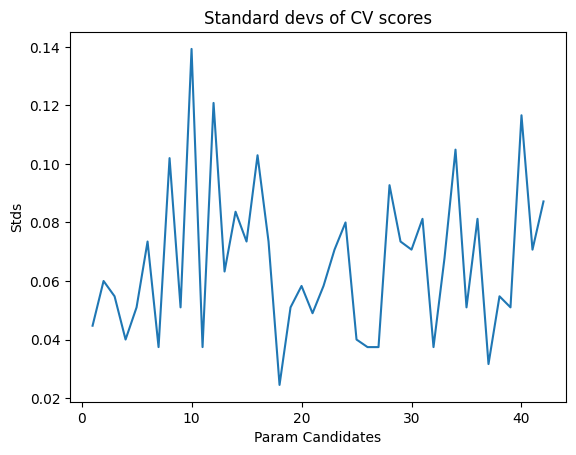

In [40]:
# Evaluate stds
cv_std(model_cv)

In [41]:
# 2
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = range(3, 20)
best_score = 0
hyper_params = ""

for c in criterion:
    for s in splitter:
        for m in max_depth:
            DTC = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m)
            DTC = DTC.fit(X_train, y_train)
            y_pred = DTC.predict(X_test)
            if accuracy_score(y_test, y_pred) > best_score:
                best_score = accuracy_score(y_test, y_pred)
                hyper_params = c + "_" + s + "_" + str(m)

print(best_score)
print(hyper_params)

0.7307692307692307
entropy_random_3


In [42]:
# Using best parameters
DTC = DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=3)
evaluate(DTC)

Training accuracy:  0.66
Test accuracy:  0.5769230769230769

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,4,9
Actual_1,2,11



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        13
           1       0.55      0.85      0.67        13

    accuracy                           0.58        26
   macro avg       0.61      0.58      0.54        26
weighted avg       0.61      0.58      0.54        26



**NOTE:**
- Test accuracy and Training accuracy are both poor (in this iteration)
- We also note that the accuracy scores fluctuate with each evaluation due to some inherent randomness in the approach to classification.
    - To demonstrate, run the cell multiple times and observe the outcome changes.
- This model displays the instability discussed in Section 3.0.3 above.
- We may revisit this model later but will eliminate it for now.

In [43]:
# Save model
save_model(DTC, "DTC")

Model: DTC.pkl saved.


### Random forest

In [44]:
# No tuning
RF = RandomForestClassifier()
evaluate(RF)

Training accuracy:  0.95
Test accuracy:  0.5384615384615384

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,5,8
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.53      0.69      0.60        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.53        26
weighted avg       0.54      0.54      0.53        26



#### Hyperparameter tuning

In [45]:
# 1
RF = RandomForestClassifier()
param_grid = {"n_estimators": range(100, 600, 100), "max_features": ["auto", "sqrt", "log2"],
              "max_depth" : range(3, 10), "criterion" :["gini", "entropy"]}

model_cv = GridSearchCV(RF, param_grid, verbose=1, n_jobs=-1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
Tuned model best score: 0.6599999999999999

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.91
Test accuracy:  0.5769230769230769

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,6,7
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



Mean of the standard deviations: nan
Std of the standard deviations: nan

 <<< -------------------------------------------------- >>> 



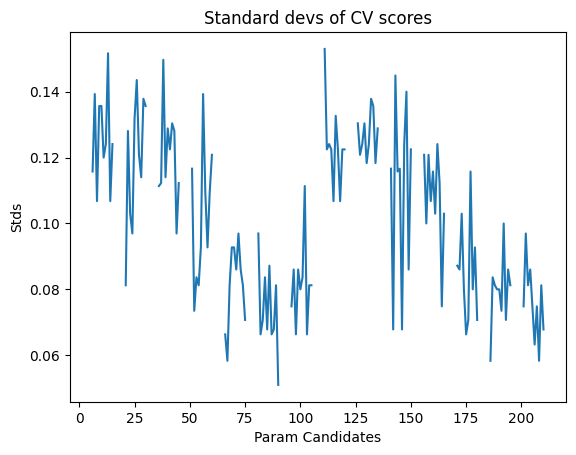

In [46]:
# Evaluate stds
cv_std(model_cv)

In [47]:
# 2
n_estimators = range(100, 600, 100)
# max_features = ["auto", "sqrt", "log2"]
max_features = ["sqrt", "log2"]
max_depth = range(3, 10)
criterion = ["gini", "entropy"]
best_score = 0
hyper_params = ""

for n in n_estimators:
    for m in max_features:
        for d in max_depth:
            for c in criterion:
                RF = RandomForestClassifier(n_estimators=n, max_features=m, max_depth=d, criterion=c)
                RF.fit(X_train, y_train)                   
                y_pred = RF.predict(X_test)
                if accuracy_score(y_test, y_pred) > best_score:
                    best_score = accuracy_score(y_test, y_pred)
                    hyper_params = str(n) + "_" + m + "_" + str(d) + "_" + c

print(best_score)
print(hyper_params)

0.6153846153846154
100_log2_9_entropy


In [48]:
# Using best parameters
RF = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=7, criterion="gini")
evaluate(RF)

Training accuracy:  0.93
Test accuracy:  0.5

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,4,9
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.50      0.69      0.58        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.48        26
weighted avg       0.50      0.50      0.48        26



**NOTE:**
- Test accuracy (54%) is poor and significantly less than the training accuracy (93%).
- This suggests overfitting.
- Additionally, successive evaluations show the same instability seen in Decision Tree Classifier and discussed in Section 3.0.3 above.
    - To demonstrate, run the cell multiple times and observe the outcome changes.
- We may revisit this model later but will eliminate it for now.

In [49]:
# Save model
save_model(RF, "RF")

Model: RF.pkl saved.


### Stochastic gradient descent (SGD)

#### Hyperparameter tuning

In [50]:
# 1
SGD = SGDClassifier()
param_grid = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
              "penalty": ["l2", "l1", "elasticnet"], "alpha": [0.000001, 0.00001, 0.0001, 0.001, 0.01]}

model_cv = GridSearchCV(SGD, param_grid, verbose=1, n_jobs=-1)
model_cv.fit(X_train, y_train)
barrier()
print(f"Tuned model paramaters: {model_cv.best_params_}")
print(f"Tuned model best score: {model_cv.best_score_}")
barrier()
evaluate_no_fit(model_cv.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits

 <<< -------------------------------------------------- >>> 

Tuned model paramaters: {'alpha': 1e-06, 'loss': 'hinge', 'penalty': 'elasticnet'}
Tuned model best score: 0.5700000000000001

 <<< -------------------------------------------------- >>> 

Training accuracy:  0.6
Test accuracy:  0.38461538461538464

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,3,10
Actual_1,6,7



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        13
           1       0.41      0.54      0.47        13

    accuracy                           0.38        26
   macro avg       0.37      0.38      0.37        26
weighted avg       0.37      0.38      0.37        26



Mean of the standard deviations: nan
Std of the standard deviations: nan

 <<< -------------------------------------------------- >>> 



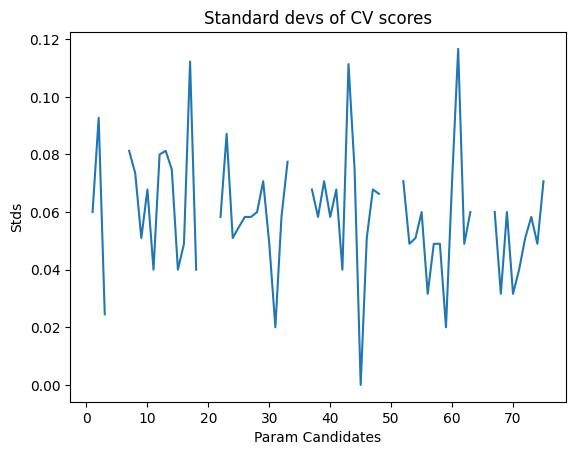

In [51]:
# Evaluate stds
cv_std(model_cv)

In [52]:
# 2
# loss = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
loss = ["hinge", "modified_huber", "squared_hinge", "perceptron"]
penalty = ["l2", "l1", "elasticnet"]
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
best_score = 0
hyper_params = ""

for l in loss :
    for p in penalty :
        for a in alpha :
            SGD = SGDClassifier(loss=l, penalty=p, alpha=a)
            SGD.fit(X_train, y_train)
            y_pred = SGD.predict(X_test)
            if accuracy_score(y_test, y_pred) > best_score:
                best_score = accuracy_score(y_test, y_pred)
                hyper_params = l + "_" + p + "_" + str(a)

print(best_score)
print(hyper_params)

0.6923076923076923
hinge_l2_0.01


In [53]:
# Using best parameters
SGD = SGDClassifier(loss="modified_huber", penalty="elasticnet", alpha=0.01)
evaluate(SGD)

Training accuracy:  0.62
Test accuracy:  0.6153846153846154

 <<< -------------------------------------------------- >>> 

Confusion matrix:


,Predicted_0,Predicted_1
Actual_0,7,6
Actual_1,4,9



 <<< -------------------------------------------------- >>> 

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



**NOTE:**
- Test accuracy (50%) and training accuracy (44%) are both poor.
- This suggests that the model is a poor overall fit.
- Additionally, successive evaluations show the same instability seen in Decision Tree Classifier, Random Forest Classifier and discussed in Section 3.0.3 above.
    - To demonstrate, run the cell multiple times and observe the outcome changes.
- We may revisit this model later but will eliminate it for now.

In [54]:
# Save model
save_model(SGD, "SGD")

Model: SGD.pkl saved.


### Inference

**We can infer:**
- The best models are the KNN, XGBoost and SVM models.
- There is some concern about the training accuracy of the SVM model (59%) which can be investigated further. However, the high test accuracy gives us confidence in the model.
- The small sample size is a significant hindrance to improving accuracy. We will investigate getting more data from the client if possible.
- There is an inherent instability present in some models which has caused us to eliminate them as viable options. For further exploration, they can be tuned using a different set or different range of parameters.

**Going forward:**
- It should be noted that low test accuracy by itself is not the ultimate arbiter of a lack of overfitting.
    - It is possible that the individual folds may themselves be overfitting to the data and affecting the averaged overall score.
    - We did some preliminary work on this by evaluating the mean, standard deviation and plots of the different score standard deviation values themselves.
    - These are the standard deviations of the different parameter combinations/folds that arise when using GridSearchCV.
    - This can be explored further.
- If more data is made available, more models can be considered such as Deep learning models or other Ensemble models.
- The models that came up top after using lazypredict can be explored (after tuning) further.

## Feature importance
### Methodology
There are many techniques for evaluating feature importance. The best method will ultimately depend on our data and our model(s). We will cover a few methods here, namely:
1. Principal Component Analysis (PCA)
2. Manually using model attributes
3. Permutation feature importance
4. Recursive Feature Elimination (RFE)
5. The **SelectFromModel** library

**NOTE:**
- We will use only the KNN, XGB and SVM models for feature importance due to their positive performance and stability.
- Additionally, we will clone the model (which preserves all internal parameters) to create a deep copy when needed.

In [55]:
# Load saved models
KNN_feat_imp = load_model("KNN.pkl")
XGB_feat_imp = load_model("XGB.pkl")
SVM_feat_imp = load_model("SVM.pkl")

### Principal component analysis (PCA)
- PCA provides **principal components** or **planes** that best represent the data based on the degree to which they "explain" the variance of that data.
- These components have coefficients, the values of which can indicate how important each feature is to that component and, by extension, can tell us how well that feature explains the data.

In [56]:
features = X.columns
features

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

**NOTE:**
As a reminder from the introduction, the features break down as follows:
- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

(126, 6)

(126, 6)

np.float64(1.0779149471889745e-16)

array([1., 1., 1., 1., 1., 1.])


 <<< -------------------------------------------------- >>> 



,0,1,2,3,4,5
0,-1.67,0.42,-0.30,0.29,-1.44,-0.32
1,-1.67,-0.48,-0.30,1.44,0.31,-1.56
2,0.84,0.42,-0.30,-0.86,-0.57,0.93
3,0.84,1.32,-0.30,-0.86,-0.57,0.93
4,0.84,1.32,-0.30,-0.86,-0.57,0.93



 <<< -------------------------------------------------- >>> 



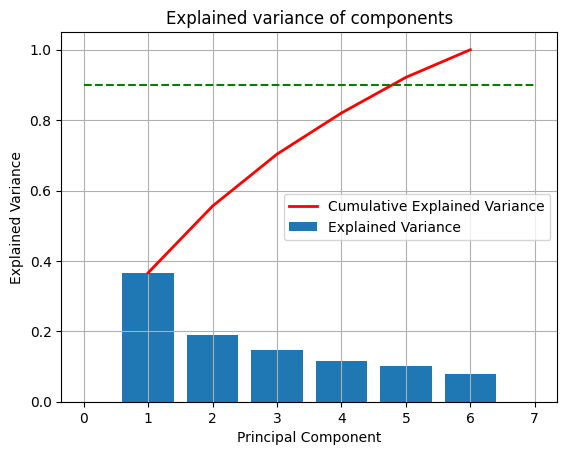

In [57]:
# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X.shape, X_scaled.shape, X_scaled.mean(axis=0).mean(), X_scaled.std(axis=0))
barrier()
display(pd.DataFrame(X_scaled).head())
barrier()

# PCA decomposition
pca = PCA().fit(X_scaled)
fig, ax = plt.subplots()
x_values = range(1, pca.n_components_ + 1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label="Explained Variance")
ax.plot(x_values,np.cumsum(pca.explained_variance_ratio_),lw=2,label="Cumulative Explained Variance",color="red")
plt.plot([0, pca.n_components_+1], [0.9, 0.9], "g--")
ax.set_title("Explained variance of components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")
plt.legend()
plt.grid()
plt.show()

**NOTE:**
- This suggests that the first principal component explains almost 37% of the variance in the data.
- The second principal component explains about half of that at 18%.

array([0.36665419, 0.18936275, 0.1474559 , 0.11686753, 0.101142  ,
       0.07851764])


 <<< -------------------------------------------------- >>> 



array([[ 0.46727244,  0.1203438 ,  0.44368484,  0.35866807,  0.50725474,
         0.42938029],
       [-0.28358867,  0.73807312,  0.3166322 ,  0.32815824, -0.08454272,
        -0.39966772],
       [-0.48229231, -0.50305971,  0.02927284,  0.71611697,  0.01343584,
         0.02154363],
       [-0.00301495,  0.39110236, -0.53041915,  0.28248846, -0.34060822,
         0.60817077],
       [-0.11244084, -0.11140388,  0.6468396 , -0.17989817, -0.62209006,
         0.37038543],
       [ 0.67525997, -0.14941383, -0.04780134,  0.37240138, -0.48203177,
        -0.38519747]])


 <<< -------------------------------------------------- >>> 



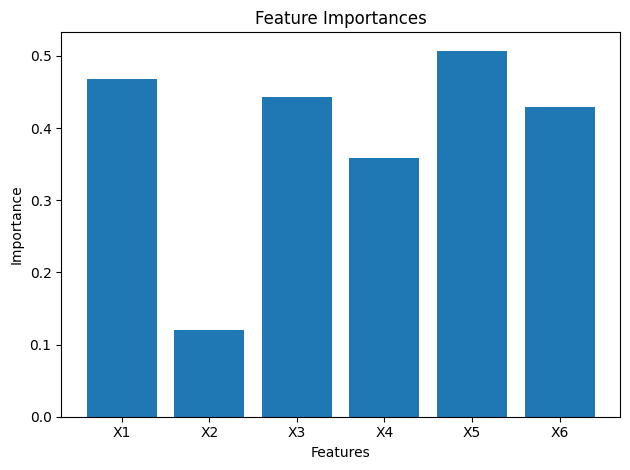

In [58]:
# Coefficients of the first component
display(pca.explained_variance_ratio_)
barrier()
display(pca.components_)
barrier()

comp_1 = pca.components_[0]
plt.bar(features, abs(comp_1))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

**NOTE:**
- The feature with the highest coefficient int he first principal component is X5.
- In general features X5, X1, X3 and X6 seem to be much higher than X2 which is significantly lower than the other features.
- We will keep this in mind as we investigate further.

### Manually using model attributes
- Certain methods of feature importance require the model to have a `coef_` or `feature_importances_` attribute.
- The coefficients (from `coef_`) indicate which features get a heavier emphasis in making predictions while `feature_importances_` more directly indicates the weight given to each feature when making predictions.
Tree based methods usually have the `feature_importances_` attribute.
- We will write code to check for and plot these values.

In [59]:
# Check for attributes
def attr_checker(model):
    print(f"feature_importances_ : {hasattr(model, 'feature_importances_')}")
    print(f"coef_ : {hasattr(model, 'coef_')}")

# Plot model coefficients
def feat_import(model):
    importance = model.coef_
    for i, v in zip(features, importance):
        print(f"Feature: {i}, Score: {v}")
    barrier()
    plt.bar(features, importance)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Importance vs Features")
    plt.show()

# Plot model feature importances
def feat_import_tree(model):
    importance = model.feature_importances_
    for i, v in zip(features, importance):
        print(f"Feature: {i}, Score: {v}")
    barrier()
    plt.bar(features, importance)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Importance vs Features")
    plt.show()

In [60]:
# Check for coef_ and feature_importances_ attributes
attr_checker(KNN_feat_imp)
attr_checker(XGB_feat_imp)
attr_checker(SVM_feat_imp)

feature_importances_ : False
coef_ : False
feature_importances_ : True
coef_ : False
feature_importances_ : False
coef_ : False


**NOTE:**
- The XGBoost model is the only model with either `coef_` or `feature_importances_` attribute.

Feature: X1, Score: 0.24489560723304749
Feature: X2, Score: 0.0
Feature: X3, Score: 0.2584708034992218
Feature: X4, Score: 0.16515572369098663
Feature: X5, Score: 0.14743636548519135
Feature: X6, Score: 0.18404151499271393

 <<< -------------------------------------------------- >>> 



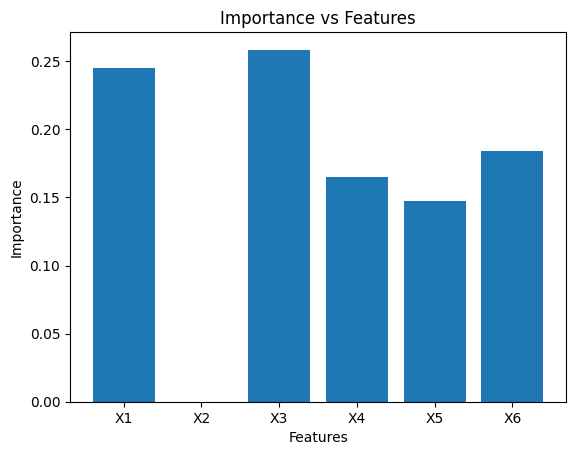

In [61]:
feat_import_tree(XGB_feat_imp)

- Like the first component on PCA, this seems to suggest that X1, X3, X4, X5, and X6 seem to be much higher than X2 which is significantly lower than the other features.

### Permutation feature importance
- Permutation feature importance is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset.
- This technique is particularly useful for non-linear or opaque estimators, and involves randomly shuffling the values of a single feature and observing the resulting degradation of the model’s score.
- By breaking the relationship between the feature and the target, we determine how much the model relies on such particular feature. [1].

**NOTE:**
- Because of the random shuffling/permutation of the features and the relatively small data size, there will be variations between each successive execution of the permutation feature importance evaluation.
- However, repeated executions demonstrate that certain features stand out more than others.

**Ref:**
1. https://scikit-learn.org/stable/modules/permutation_importance.html

In [62]:
# Permutation feature importance
def feat_import_perm(model):
    results = permutation_importance(model, X_train, y_train, scoring="accuracy")
    importance = results.importances_mean
    for i, v in zip(features, importance):
        print(f"Feature: {i}, Score: {v}")
    barrier()
    plt.bar(features, importance)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Importance vs Features")
    plt.show()

Feature: X1, Score: 0.016000000000000014
Feature: X2, Score: -0.04199999999999995
Feature: X3, Score: 0.09800000000000002
Feature: X4, Score: 0.014000000000000012
Feature: X5, Score: 0.04200000000000004
Feature: X6, Score: 0.020000000000000018

 <<< -------------------------------------------------- >>> 



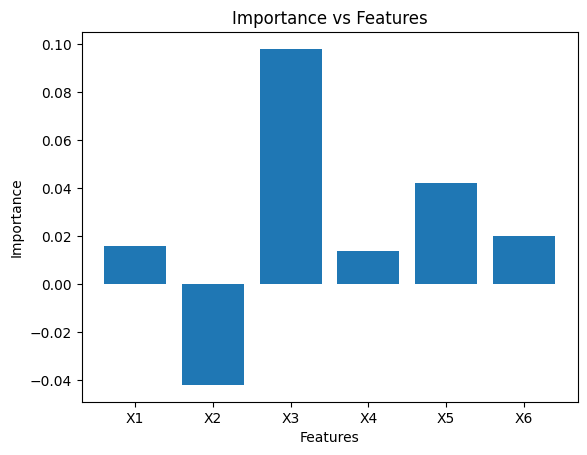

In [63]:
feat_import_perm(KNN_feat_imp)

**NOTE:**
- This suggests that X3, X2 and X6 are the most important features.

Feature: X1, Score: 0.06599999999999998
Feature: X2, Score: -0.0020000000000000018
Feature: X3, Score: 0.027999999999999935
Feature: X4, Score: -0.0020000000000000018
Feature: X5, Score: -0.02200000000000002
Feature: X6, Score: 0.019999999999999952

 <<< -------------------------------------------------- >>> 



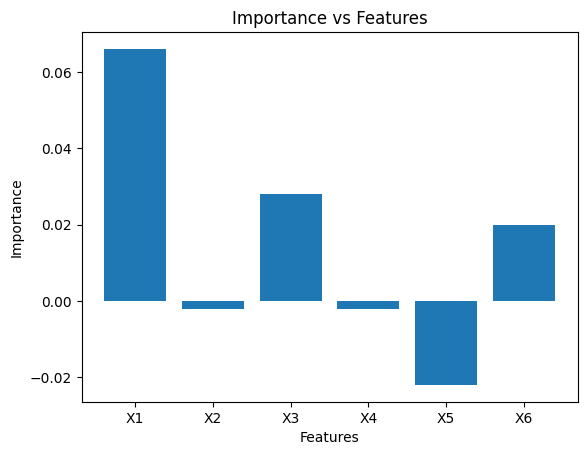

In [64]:
feat_import_perm(SVM_feat_imp)

**NOTE:**
- This suggests that X1, X5 and X6 are the most important features.

Feature: X1, Score: 0.14799999999999996
Feature: X2, Score: 0.0
Feature: X3, Score: 0.06799999999999998
Feature: X4, Score: 0.014000000000000012
Feature: X5, Score: 0.07999999999999999
Feature: X6, Score: -0.006000000000000005

 <<< -------------------------------------------------- >>> 



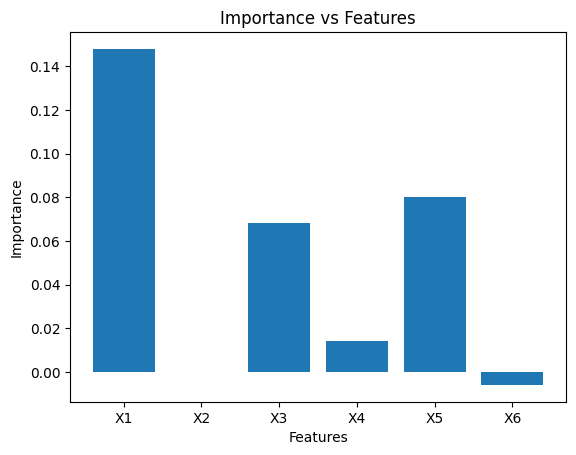

In [65]:
feat_import_perm(XGB_feat_imp)

**NOTE:**
- This suggests that X1, X3 and X5 are the most important features.

### Recursive feature elimination (RFE)
- The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
- First, the estimator is trained on the initial set of features and the importance of each feature is obtained through the model attributes.
- Then, the least important features are pruned from current set of features.
- That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached [1].

**NOTE:**
- RFE will not work on the KNN model or the SVM model as they have neither a `coef_` or a `feature_importances_ ` attribute.
- This rules out the KNN and SVM models but allows for the XGB model.

**Ref:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [66]:
rfe = RFE(clone(XGB_feat_imp), n_features_to_select=1)
rfe.fit(X_train, y_train)

for i, j in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(i, j)

1 X1
2 X3
3 X6
4 X5
5 X4
6 X2


**NOTE:**
- This suggests that the most important features, in order is X1, X3, X6, X5, X4 and X2.

#### RFE cross validation (RFECV)
- RFE cross validation (RFECV) combines the RFE above with cross validation and gives the best combination of features that maximizes the accuracy with the smallest possible number of features.
- The number of features selected is tuned automatically by fitting an RFE selector on the different cross-validation splits (provided by the cv parameter).
- The performance of the RFE selector are evaluated using scorer for different number of selected features and aggregated together.
- Finally, the scores are averaged across folds and the number of features selected is set to the number of features that maximize the cross-validation score [1].

**NOTE:**
- Like RFE, RFECV will not work on the KNN model or the SVM model as they have neither a `coef_` or a `feature_importances_ attricbute`.
- This rules out the KNN and SVM models but allows for the XGB model.

**Ref:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [67]:
rfecv = RFECV(estimator=clone(XGB_feat_imp), step=1, cv=5, scoring="accuracy")
rfecv = rfecv.fit(X_train, y_train)
print("Optimal number of features :", rfecv.n_features_)
print("Best features :", X_train.columns[rfecv.support_])

Optimal number of features : 2
Best features : Index(['X1', 'X3'], dtype='object')


**NOTE:**
- This suggests that X1 and X3 are the most important features.

### SelectFromModel
- The `SelectFromModel` library is a meta-transformer for selecting features based on importance weights [1].

**NOTE:**
- Like RFE and RFECV, `SelectFromModel` will not work on the KNN model or the SVM model as they have neither a `coef_` or a `feature_importances_` attribute.
- This rules out the KNN and SVM models but allows for the XGB model.

**Ref:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [68]:
model = clone(XGB_feat_imp)

def select_features(model, n):
    fs = SelectFromModel(model, max_features=n)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

for i in range(1, 7):
    X_train_fs, X_test_fs, fs = select_features(model, i)
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_test_fs)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"With {i} feature(s), Accuracy: {(accuracy)}")
    print(f"Features: {features[fs.get_support()].to_list()}")
    barrier()

With 1 feature(s), Accuracy: 0.46153846153846156
Features: ['X3']

 <<< -------------------------------------------------- >>> 

With 2 feature(s), Accuracy: 0.5769230769230769
Features: ['X1', 'X3']

 <<< -------------------------------------------------- >>> 

With 3 feature(s), Accuracy: 0.6923076923076923
Features: ['X1', 'X3', 'X6']

 <<< -------------------------------------------------- >>> 

With 4 feature(s), Accuracy: 0.6923076923076923
Features: ['X1', 'X3', 'X6']

 <<< -------------------------------------------------- >>> 

With 5 feature(s), Accuracy: 0.6923076923076923
Features: ['X1', 'X3', 'X6']

 <<< -------------------------------------------------- >>> 

With 6 feature(s), Accuracy: 0.6923076923076923
Features: ['X1', 'X3', 'X6']

 <<< -------------------------------------------------- >>> 



**NOTE:**
- This suggests that the most important features appear to be X3, X1, X6 in that order.
- There is negligible difference between using more than 3 (4, 5 or 6) features.
- However, all accuracies are less than the best accuracies achieved by the best models which used all features.